In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_tabnet
import pickle
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.augmentations import ClassificationSMOTE

from sklearn.preprocessing import LabelEncoder

from Utility import *

from matplotlib import pyplot as plt

### Define optimizers

In [2]:
sgd = torch.optim.SGD
adam = torch.optim.Adam

# SGD

In [3]:
sgd_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'rel_imp_std', 'irrel_imp_std', 'rand_imp_std',
                               'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### SGD; N = 50, p = 6, d = 4

In [4]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.16051 | train_auc: 0.56333 | valid_auc: 0.5     |  0:00:00s
epoch 1  | loss: 1.8379  | train_auc: 0.56333 | valid_auc: 0.5     |  0:00:00s
epoch 2  | loss: 1.84348 | train_auc: 0.53333 | valid_auc: 0.7     |  0:00:00s
epoch 3  | loss: 1.55632 | train_auc: 0.55333 | valid_auc: 0.7     |  0:00:00s
epoch 4  | loss: 1.89673 | train_auc: 0.51667 | valid_auc: 0.8     |  0:00:01s
epoch 5  | loss: 2.14134 | train_auc: 0.46333 | valid_auc: 0.8     |  0:00:01s
epoch 6  | loss: 2.13106 | train_auc: 0.46333 | valid_auc: 0.8     |  0:00:01s
epoch 7  | loss: 1.99517 | train_auc: 0.46333 | valid_auc: 0.7     |  0:00:01s
epoch 8  | loss: 2.09807 | train_auc: 0.47    | valid_auc: 0.8     |  0:00:01s
epoch 9  | loss: 1.90659 | train_auc: 0.46333 | valid_auc: 0.8     |  0:00:01s
epoch 10 | loss: 2.06624 | train_auc: 0.48667 | valid_auc: 0.8     |  0:00:01s
epoch 11 | loss: 1.89003 | train_auc: 0.49667 | valid_auc: 0.8     |  0:00:02s
epoch 12 | loss: 1.5216  | train_auc: 0.48667 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.11133304404407711
Average irrelevant feature importance: 0.0726349382389418
Average random feature importance: 0.13985727429875508
Relevant feature importance: [0.14238962 0.08027647]
Irrelevant feature importance: [0.06118809 0.08609426 0.07062246]
Random feature importance: [0.14258045 0.05796732 0.21378472 0.1450966 ]
Train AUC score: 0.5166666666666666
Validation AUC score: 0.8
Test AUC score: 0.4
False negative rate for relevant features: 0.5
False positive rate for irrelevant features: 0.0
False positive rate for random features: 0.75


C:\Users\hberg\AppData\Local\Temp\ipykernel_44728\342369443.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)


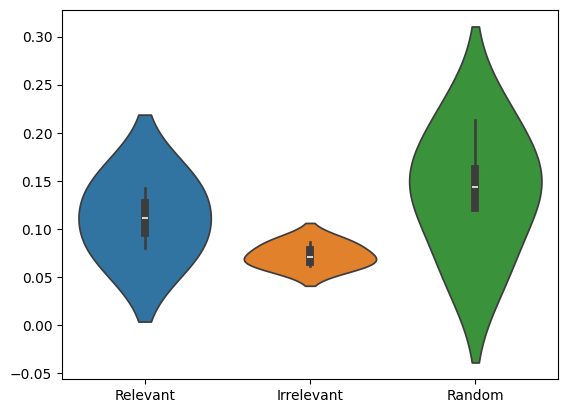

In [5]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 50, p = 60, d = 40

In [6]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.70554 | train_auc: 0.49855 | valid_auc: 0.75    |  0:00:00s
epoch 1  | loss: 1.03687 | train_auc: 0.54783 | valid_auc: 0.75    |  0:00:00s
epoch 2  | loss: 0.99797 | train_auc: 0.6029  | valid_auc: 0.75    |  0:00:00s
epoch 3  | loss: 0.99451 | train_auc: 0.63768 | valid_auc: 0.625   |  0:00:00s
epoch 4  | loss: 0.86444 | train_auc: 0.61739 | valid_auc: 0.5     |  0:00:01s
epoch 5  | loss: 0.96416 | train_auc: 0.6087  | valid_auc: 0.5     |  0:00:01s
epoch 6  | loss: 0.93614 | train_auc: 0.61159 | valid_auc: 0.5     |  0:00:01s
epoch 7  | loss: 0.8099  | train_auc: 0.61449 | valid_auc: 0.5     |  0:00:01s
epoch 8  | loss: 0.95736 | train_auc: 0.61159 | valid_auc: 0.5     |  0:00:01s
epoch 9  | loss: 0.83424 | train_auc: 0.64638 | valid_auc: 0.625   |  0:00:02s
epoch 10 | loss: 1.01339 | train_auc: 0.65507 | valid_auc: 0.625   |  0:00:02s
epoch 11 | loss: 0.75956 | train_auc: 0.65217 | valid_auc: 0.625   |  0:00:02s
epoch 12 | loss: 0.90563 | train_auc: 0.66377 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.011160472375177305
Average irrelevant feature importance: 0.010431653026182078
Average random feature importance: 0.009194240660709178
Relevant feature importance: [0.02054846 0.00988929 0.00521414 0.01086563 0.00820644 0.00380151
 0.0093828  0.01216425 0.00510027 0.00781051 0.0086353  0.01630828
 0.0051247  0.01385553 0.01002819 0.00685369 0.00747219 0.0108025
 0.01669336 0.02709994 0.01187963 0.01299652 0.01595774]
Irrelevant feature importance: [0.00767881 0.00750689 0.01688109 0.02333308 0.00555292 0.00635162
 0.00870535 0.00973493 0.00391856 0.00632099 0.00899336 0.00712418
 0.00927053 0.00486959 0.00912274 0.01684361 0.0123048  0.00838897
 0.00568143 0.00755699 0.0163442  0.01216721 0.01015769 0.00311617
 0.00871648 0.01083386 0.01253212 0.01139815 0.00939813 0.00868456
 0.01716137 0.0072972  0.03023735 0.00737743 0.01296971 0.01100744]
Random feature importance: [0.01725649 0.0065924  0.00584903 0.01106843 0.01271705 0.00715124
 0.01116979 

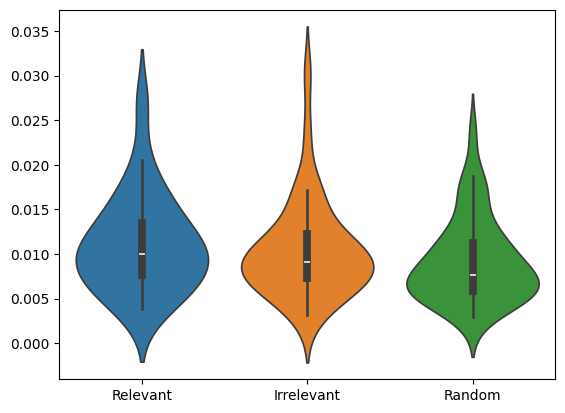

In [7]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 50, p = 600, d = 400

In [8]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.90243 | train_auc: 0.53611 | valid_auc: 0.5     |  0:00:00s
epoch 1  | loss: 0.86098 | train_auc: 0.63333 | valid_auc: 0.33333 |  0:00:01s
epoch 2  | loss: 0.87461 | train_auc: 0.73333 | valid_auc: 0.16667 |  0:00:02s
epoch 3  | loss: 0.85473 | train_auc: 0.63889 | valid_auc: 0.16667 |  0:00:03s
epoch 4  | loss: 0.96712 | train_auc: 0.63056 | valid_auc: 0.16667 |  0:00:04s
epoch 5  | loss: 1.26047 | train_auc: 0.6     | valid_auc: 0.16667 |  0:00:05s
epoch 6  | loss: 1.1362  | train_auc: 0.55556 | valid_auc: 0.16667 |  0:00:06s
epoch 7  | loss: 0.85239 | train_auc: 0.54167 | valid_auc: 0.16667 |  0:00:07s
epoch 8  | loss: 0.92152 | train_auc: 0.52778 | valid_auc: 0.33333 |  0:00:08s
epoch 9  | loss: 1.09756 | train_auc: 0.50556 | valid_auc: 0.16667 |  0:00:08s
epoch 10 | loss: 0.85452 | train_auc: 0.50278 | valid_auc: 0.16667 |  0:00:09s
epoch 11 | loss: 0.80875 | train_auc: 0.47778 | valid_auc: 0.16667 |  0:00:10s
epoch 12 | loss: 0.90531 | train_auc: 0.46389 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0008899666373022679
Average irrelevant feature importance: 0.0009903495749655517
Average random feature importance: 0.0010269898052554147
Relevant feature importance: [2.34160500e-04 8.78173419e-04 1.95702064e-03 2.56468319e-03
 4.79882746e-03 5.72105339e-06 6.24701476e-04 2.88978965e-03
 3.00718595e-05 3.50286655e-05 5.34157309e-04 9.54773321e-04
 1.87683156e-03 9.30773002e-04 3.72061077e-04 4.30932824e-04
 7.71323860e-04 1.06063965e-03 4.49390084e-04 6.72030382e-04
 4.91522080e-04 3.37258782e-04 6.54618348e-04 3.42055374e-04
 1.05701084e-03 6.28030641e-04 3.38289785e-04 1.04129590e-04
 2.86519967e-04 3.14786871e-04 1.43695813e-04 1.15908215e-03
 1.17751624e-03 9.04049068e-05 1.08827660e-03 2.87146578e-03
 2.10265084e-04 1.52883524e-03 5.18859905e-04 1.84950506e-04]
Irrelevant feature importance: [3.98758594e-04 1.32363670e-04 1.11098782e-03 4.60612520e-04
 6.76471437e-04 1.71888881e-03 4.58074658e-04 9.50993781e-06
 4.20367849e-04 1.94556202e-03

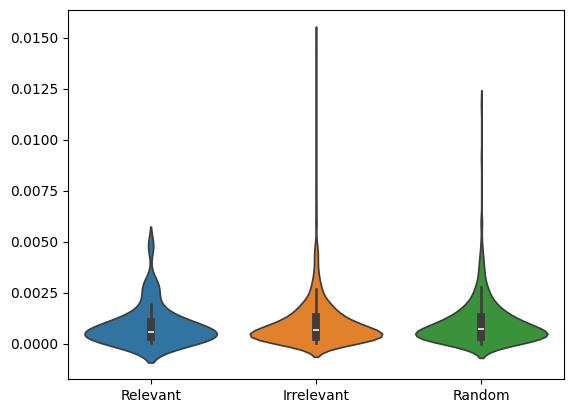

In [9]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 500, p = 6, d = 4

In [10]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.00381 | train_auc: 0.43    | valid_auc: 0.56689 |  0:00:01s
epoch 1  | loss: 0.98964 | train_auc: 0.46428 | valid_auc: 0.57525 |  0:00:02s
epoch 2  | loss: 0.99906 | train_auc: 0.44284 | valid_auc: 0.49331 |  0:00:03s
epoch 3  | loss: 1.01016 | train_auc: 0.47619 | valid_auc: 0.49666 |  0:00:04s
epoch 4  | loss: 0.95893 | train_auc: 0.48011 | valid_auc: 0.48997 |  0:00:05s
epoch 5  | loss: 0.98176 | train_auc: 0.48856 | valid_auc: 0.50334 |  0:00:06s
epoch 6  | loss: 0.92881 | train_auc: 0.50258 | valid_auc: 0.50167 |  0:00:07s
epoch 7  | loss: 0.90659 | train_auc: 0.49596 | valid_auc: 0.50502 |  0:00:08s
epoch 8  | loss: 1.04021 | train_auc: 0.51487 | valid_auc: 0.54013 |  0:00:09s
epoch 9  | loss: 0.88385 | train_auc: 0.5093  | valid_auc: 0.51505 |  0:00:11s
epoch 10 | loss: 0.92941 | train_auc: 0.50038 | valid_auc: 0.50669 |  0:00:12s
epoch 11 | loss: 0.83451 | train_auc: 0.4946  | valid_auc: 0.51839 |  0:00:13s
epoch 12 | loss: 0.94651 | train_auc: 0.48306 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.15949111113532896
Average irrelevant feature importance: 0.12577998830114473
Average random feature importance: 0.06749167249793091
Relevant feature importance: [0.21317334 0.14061526 0.12468474]
Irrelevant feature importance: [0.10469318 0.1468668 ]
Random feature importance: [0.05729384 0.06172444 0.09284042 0.05810799]
Train AUC score: 0.9738445845212251
Validation AUC score: 0.9632107023411371
Test AUC score: 0.9818181818181818
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.5
False positive rate for random features: 0.0


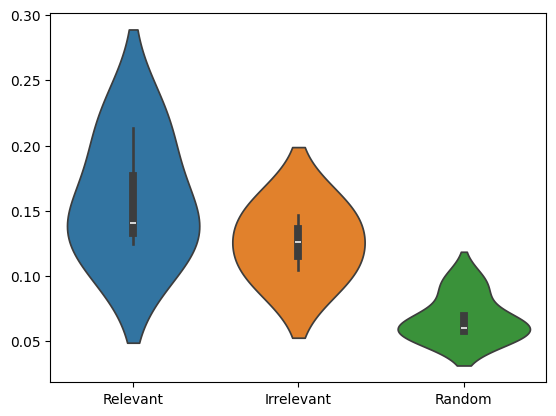

In [11]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 500, p = 60, d = 40

In [12]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.93147 | train_auc: 0.46744 | valid_auc: 0.40909 |  0:00:01s
epoch 1  | loss: 0.93151 | train_auc: 0.47047 | valid_auc: 0.34848 |  0:00:02s
epoch 2  | loss: 0.93026 | train_auc: 0.47353 | valid_auc: 0.43434 |  0:00:04s
epoch 3  | loss: 0.90192 | train_auc: 0.4831  | valid_auc: 0.45286 |  0:00:05s
epoch 4  | loss: 0.90712 | train_auc: 0.47338 | valid_auc: 0.47138 |  0:00:07s
epoch 5  | loss: 0.88872 | train_auc: 0.47738 | valid_auc: 0.47811 |  0:00:08s
epoch 6  | loss: 0.97882 | train_auc: 0.48025 | valid_auc: 0.48316 |  0:00:09s
epoch 7  | loss: 0.91674 | train_auc: 0.483   | valid_auc: 0.44613 |  0:00:11s
epoch 8  | loss: 0.95846 | train_auc: 0.5     | valid_auc: 0.46128 |  0:00:12s
epoch 9  | loss: 0.97283 | train_auc: 0.48381 | valid_auc: 0.47643 |  0:00:13s
epoch 10 | loss: 0.90078 | train_auc: 0.46556 | valid_auc: 0.57912 |  0:00:15s
epoch 11 | loss: 0.93186 | train_auc: 0.47787 | valid_auc: 0.57071 |  0:00:16s
epoch 12 | loss: 0.84434 | train_auc: 0.5028  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.010590561420427275
Average irrelevant feature importance: 0.011164072205416462
Average random feature importance: 0.00879107335025585
Relevant feature importance: [0.01380018 0.01058455 0.02038537 0.00657742 0.00890477 0.01104215
 0.00971533 0.00663192 0.00842167 0.00928412 0.00594648 0.00856636
 0.00907639 0.00882802 0.01762417 0.01042234 0.00790686 0.01691202]
Irrelevant feature importance: [0.00898934 0.01113356 0.01130533 0.01058541 0.00772772 0.00824912
 0.0106673  0.01102743 0.00850273 0.00420154 0.00556067 0.00781681
 0.00877105 0.01511293 0.00812149 0.01009405 0.00917084 0.00720108
 0.00789903 0.01041204 0.01365793 0.02214859 0.00645284 0.00769175
 0.00595289 0.00586312 0.00993531 0.01812112 0.00835258 0.00816583
 0.00787045 0.0228445  0.00986536 0.01419461 0.01241297 0.01681953
 0.01501317 0.00999758 0.01772809 0.0259666  0.01612268]
Random feature importance: [0.00623602 0.00822686 0.0095589  0.01618372 0.00652669 0.00787378
 0.01013418 

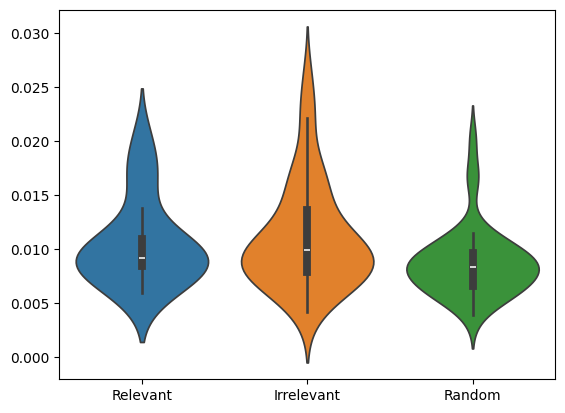

In [13]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 500, p = 600, d = 400

In [14]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.38266 | train_auc: 0.35376 | valid_auc: 0.3225  |  0:00:02s
epoch 1  | loss: 1.28003 | train_auc: 0.40935 | valid_auc: 0.40583 |  0:00:04s
epoch 2  | loss: 1.30251 | train_auc: 0.38445 | valid_auc: 0.41083 |  0:00:07s
epoch 3  | loss: 1.40282 | train_auc: 0.40226 | valid_auc: 0.42333 |  0:00:09s
epoch 4  | loss: 1.40767 | train_auc: 0.40784 | valid_auc: 0.51833 |  0:00:12s
epoch 5  | loss: 1.31684 | train_auc: 0.40241 | valid_auc: 0.465   |  0:00:14s
epoch 6  | loss: 1.36804 | train_auc: 0.44172 | valid_auc: 0.475   |  0:00:17s
epoch 7  | loss: 1.46297 | train_auc: 0.43715 | valid_auc: 0.4725  |  0:00:19s
epoch 8  | loss: 1.25507 | train_auc: 0.44148 | valid_auc: 0.45167 |  0:00:22s
epoch 9  | loss: 1.14484 | train_auc: 0.4562  | valid_auc: 0.5075  |  0:00:24s
epoch 10 | loss: 1.35645 | train_auc: 0.43092 | valid_auc: 0.46417 |  0:00:27s
epoch 11 | loss: 1.42918 | train_auc: 0.42721 | valid_auc: 0.46667 |  0:00:29s
epoch 12 | loss: 1.16487 | train_auc: 0.44538 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0010659720610231946
Average irrelevant feature importance: 0.0010045054786015162
Average random feature importance: 0.0009808473995569723
Relevant feature importance: [0.00080205 0.00033757 0.00127643 0.00060866 0.00324117 0.00079485
 0.00197264 0.00067035 0.00145103 0.00090462 0.00098076 0.00123665
 0.0013131  0.00067891 0.00086669 0.00032069 0.00199135 0.00041662
 0.00109694 0.00070316 0.00103915 0.00149976 0.00045647 0.00174075
 0.00072765 0.00026754 0.00382353 0.00100224 0.00061959 0.0005801
 0.00089299 0.00167559 0.00083432 0.00081329 0.00061459 0.00088335
 0.00138105 0.00044374 0.00075539 0.00206009 0.00060971 0.00100979
 0.00040111 0.00092844 0.00043969 0.00066733 0.00161618 0.00054362
 0.00048576 0.00163594 0.00026611 0.00234357 0.00104962 0.00108796
 0.00127372 0.00043814 0.00080869 0.00139958 0.00066518 0.00067547
 0.00096346 0.00094738 0.00034739 0.00236083 0.00039147 0.00071589
 0.00175728 0.00067642 0.00155724 0.00057661 0.00103049 0.

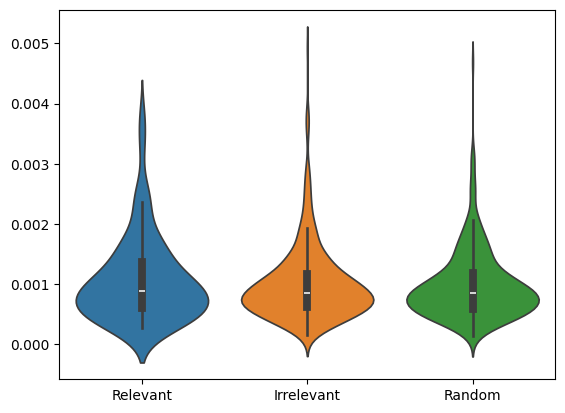

In [15]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)
plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 5000, p = 6, d = 4

In [16]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.9661  | train_auc: 0.55061 | valid_auc: 0.56625 |  0:00:09s
epoch 1  | loss: 0.78971 | train_auc: 0.59534 | valid_auc: 0.59778 |  0:00:19s
epoch 2  | loss: 0.7129  | train_auc: 0.64246 | valid_auc: 0.6416  |  0:00:29s
epoch 3  | loss: 0.66904 | train_auc: 0.67375 | valid_auc: 0.67057 |  0:00:39s
epoch 4  | loss: 0.65166 | train_auc: 0.69746 | valid_auc: 0.68877 |  0:00:49s
epoch 5  | loss: 0.63312 | train_auc: 0.73081 | valid_auc: 0.72551 |  0:01:00s
epoch 6  | loss: 0.62835 | train_auc: 0.74587 | valid_auc: 0.73588 |  0:01:10s
epoch 7  | loss: 0.60836 | train_auc: 0.7513  | valid_auc: 0.75035 |  0:01:19s
epoch 8  | loss: 0.59372 | train_auc: 0.76681 | valid_auc: 0.76665 |  0:01:29s
epoch 9  | loss: 0.58474 | train_auc: 0.78906 | valid_auc: 0.79532 |  0:01:38s
epoch 10 | loss: 0.57626 | train_auc: 0.79739 | valid_auc: 0.80835 |  0:01:48s
epoch 11 | loss: 0.56706 | train_auc: 0.80429 | valid_auc: 0.81534 |  0:01:58s
epoch 12 | loss: 0.55902 | train_auc: 0.8125  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.12619313415596112
Average irrelevant feature importance: 0.3609042782552003
Average random feature importance: 0.0335807962802388
Relevant feature importance: [0.23758356 0.07210102 0.06365893 0.13142903]
Irrelevant feature importance: [0.36090428]
Random feature importance: [0.03145526 0.01802994 0.03467366 0.05016432]
Train AUC score: 0.9108413714186209
Validation AUC score: 0.9217846153846154
Test AUC score: 0.8961884696418311
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


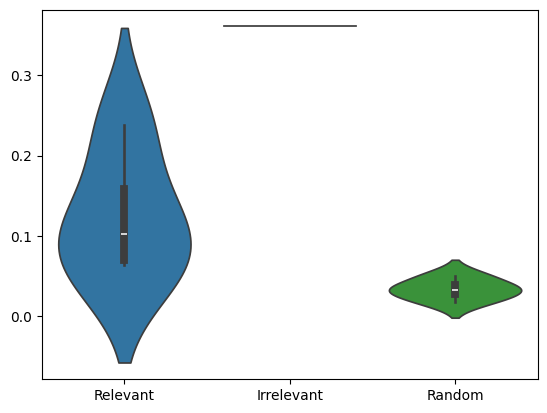

In [17]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 5000, p = 60, d = 40

In [18]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.86065 | train_auc: 0.49725 | valid_auc: 0.45426 |  0:00:11s
epoch 1  | loss: 0.85875 | train_auc: 0.50042 | valid_auc: 0.4855  |  0:00:22s
epoch 2  | loss: 0.85347 | train_auc: 0.49926 | valid_auc: 0.50196 |  0:00:33s
epoch 3  | loss: 0.84034 | train_auc: 0.49521 | valid_auc: 0.50495 |  0:00:44s
epoch 4  | loss: 0.83764 | train_auc: 0.51711 | valid_auc: 0.52243 |  0:00:56s
epoch 5  | loss: 0.82688 | train_auc: 0.51224 | valid_auc: 0.531   |  0:01:07s
epoch 6  | loss: 0.80018 | train_auc: 0.52241 | valid_auc: 0.52539 |  0:01:18s
epoch 7  | loss: 0.81019 | train_auc: 0.52357 | valid_auc: 0.53143 |  0:01:29s
epoch 8  | loss: 0.79395 | train_auc: 0.52193 | valid_auc: 0.52889 |  0:01:40s
epoch 9  | loss: 0.79555 | train_auc: 0.52884 | valid_auc: 0.53519 |  0:01:51s
epoch 10 | loss: 0.78817 | train_auc: 0.53556 | valid_auc: 0.53358 |  0:02:02s
epoch 11 | loss: 0.79321 | train_auc: 0.55001 | valid_auc: 0.57337 |  0:02:13s
epoch 12 | loss: 0.76643 | train_auc: 0.55508 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.006660226166461341
Average irrelevant feature importance: 0.016132314360286632
Average random feature importance: 0.0038096605718791685
Relevant feature importance: [0.0088375  0.01114914 0.0051961  0.00355033 0.00415455 0.00219781
 0.00512711 0.00616333 0.00652421 0.00947017 0.01089224]
Irrelevant feature importance: [0.00763334 0.00647453 0.02618394 0.01144831 0.02271426 0.00105678
 0.00258351 0.01242958 0.00739048 0.00493614 0.00078587 0.02555398
 0.03496867 0.02424118 0.02512571 0.00386294 0.12089383 0.00916043
 0.00516854 0.00670932 0.01553633 0.00932418 0.00362267 0.01880496
 0.00600392 0.00323412 0.00201804 0.00502416 0.08922108 0.02500672
 0.01132602 0.07943055 0.00121479 0.00521863 0.00525204 0.01265672
 0.00383624 0.02046039 0.00121759 0.03010196 0.00113408 0.00640727
 0.01148713 0.00445907 0.00624077 0.00515479 0.01375568 0.01787982]
Random feature importance: [0.0039012  0.00380446 0.0035775  0.00256403 0.00326149 0.00212294
 0.0081464

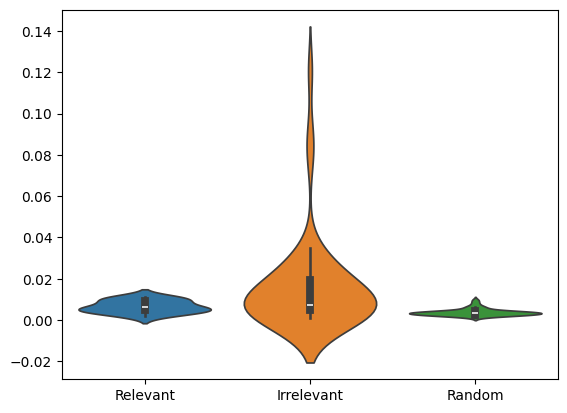

In [19]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

### SGD; N = 5000, p = 600, d = 400

In [20]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.918   | train_auc: 0.42714 | valid_auc: 0.4142  |  0:00:21s
epoch 1  | loss: 0.91752 | train_auc: 0.44377 | valid_auc: 0.43368 |  0:00:45s
epoch 2  | loss: 0.89815 | train_auc: 0.46027 | valid_auc: 0.40962 |  0:01:08s
epoch 3  | loss: 0.91176 | train_auc: 0.46396 | valid_auc: 0.46842 |  0:01:29s
epoch 4  | loss: 0.91449 | train_auc: 0.46414 | valid_auc: 0.43085 |  0:01:52s
epoch 5  | loss: 0.92015 | train_auc: 0.4629  | valid_auc: 0.43229 |  0:02:14s
epoch 6  | loss: 0.92753 | train_auc: 0.4581  | valid_auc: 0.44297 |  0:02:36s
epoch 7  | loss: 0.90741 | train_auc: 0.47201 | valid_auc: 0.42653 |  0:02:58s
epoch 8  | loss: 0.9118  | train_auc: 0.47528 | valid_auc: 0.45468 |  0:03:20s
epoch 9  | loss: 0.90492 | train_auc: 0.46921 | valid_auc: 0.44379 |  0:03:42s
epoch 10 | loss: 0.92901 | train_auc: 0.473   | valid_auc: 0.45954 |  0:04:04s
epoch 11 | loss: 0.89806 | train_auc: 0.45559 | valid_auc: 0.42457 |  0:04:26s
epoch 12 | loss: 0.89184 | train_auc: 0.47123 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.000991363830092572
Average irrelevant feature importance: 0.0010394334094854566
Average random feature importance: 0.0009841874378309988
Relevant feature importance: [0.00122908 0.00084852 0.00089539 0.00042067 0.00098838 0.00104064
 0.00071847 0.00059306 0.00076464 0.00189499 0.00141517 0.00080861
 0.00065656 0.00079419 0.00062373 0.00063977 0.00072272 0.00110583
 0.00439708 0.00095321 0.00126351 0.00081962 0.00059744 0.00085049
 0.00091125 0.00074863 0.00059714 0.00068131 0.00141982 0.00192351
 0.00039457 0.00121027 0.00062356 0.00162086 0.00080353 0.00097762
 0.0009904  0.0022369  0.00123541 0.00065341 0.00080178 0.0012267
 0.00222684 0.00058861 0.00063386 0.00151084 0.0004464  0.00058576
 0.00076284 0.00067707 0.00114835 0.00157204 0.00094565 0.00064805
 0.00122704 0.00113733 0.00305125 0.00079324 0.00079911 0.00095249
 0.00177585 0.00078869 0.00046037 0.00065962 0.0007384  0.00107742
 0.00080063 0.00068349 0.000964   0.00084237 0.00049129 0.0

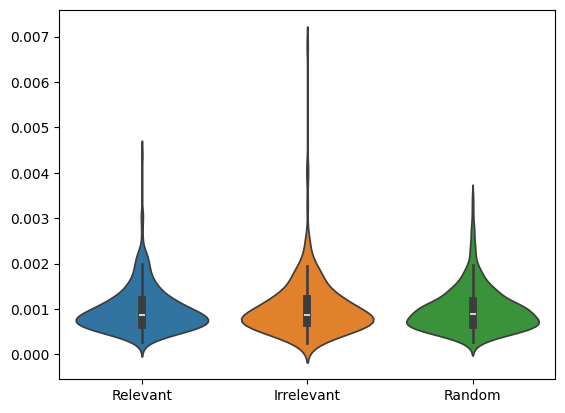

In [21]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/SGD", "violin_plot_sgd_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
sgd_df = pd.concat([sgd_df, pd.DataFrame([new_row])], ignore_index=True)

In [22]:
sgd_df.to_csv(os.path.join("Results/SGD", "sgd_data.csv"), index=False)

# Adam

In [23]:
adam_df = pd.DataFrame(columns=['n', 'p', 'd', 'rel_imp', 'irrel_imp', 'rand_imp', 'rel_imp_std', 'irrel_imp_std', 'rand_imp_std',
                               'train_auc', 'valid_auc', 'test_auc', 'fn_rel', 'fp_irrel', 'fp_rand'])

### Adam; N = 50, p = 6, d = 4

In [24]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.82183 | train_auc: 0.5     | valid_auc: 0.33333 |  0:00:00s
epoch 1  | loss: 1.47109 | train_auc: 0.47656 | valid_auc: 0.33333 |  0:00:00s
epoch 2  | loss: 1.27745 | train_auc: 0.52865 | valid_auc: 0.33333 |  0:00:00s
epoch 3  | loss: 0.99769 | train_auc: 0.53906 | valid_auc: 0.33333 |  0:00:00s
epoch 4  | loss: 0.95629 | train_auc: 0.54167 | valid_auc: 0.33333 |  0:00:00s
epoch 5  | loss: 0.8634  | train_auc: 0.56771 | valid_auc: 0.44444 |  0:00:00s
epoch 6  | loss: 0.74554 | train_auc: 0.58854 | valid_auc: 0.33333 |  0:00:01s
epoch 7  | loss: 0.77559 | train_auc: 0.60938 | valid_auc: 0.33333 |  0:00:01s
epoch 8  | loss: 0.63309 | train_auc: 0.60417 | valid_auc: 0.33333 |  0:00:01s
epoch 9  | loss: 0.80995 | train_auc: 0.59896 | valid_auc: 0.33333 |  0:00:01s
epoch 10 | loss: 0.78808 | train_auc: 0.60938 | valid_auc: 0.33333 |  0:00:01s
epoch 11 | loss: 0.76915 | train_auc: 0.63542 | valid_auc: 0.33333 |  0:00:01s
epoch 12 | loss: 0.76995 | train_auc: 0.64844 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.17072302216840937
Average irrelevant feature importance: 0.0991948146837126
Average random feature importance: 0.09024237790301085
Relevant feature importance: [0.20364924 0.13779681]
Irrelevant feature importance: [0.13965384 0.04227084 0.11565976]
Random feature importance: [0.04779079 0.09358797 0.17037293 0.04921782]
Train AUC score: 1.0
Validation AUC score: 0.888888888888889
Test AUC score: 0.6666666666666666
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 0.3333333333333333
False positive rate for random features: 0.25


C:\Users\hberg\AppData\Local\Temp\ipykernel_44728\2367968435.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)


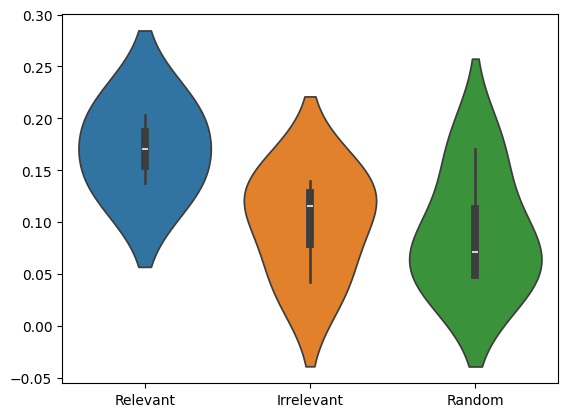

In [25]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_6_4.png"))
new_row = {'n': 50, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 60, d = 40

In [26]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.1016  | train_auc: 0.4626  | valid_auc: 0.5     |  0:00:00s
epoch 1  | loss: 0.94319 | train_auc: 0.48753 | valid_auc: 0.75    |  0:00:00s
epoch 2  | loss: 0.90858 | train_auc: 0.42659 | valid_auc: 0.625   |  0:00:00s
epoch 3  | loss: 0.71893 | train_auc: 0.44875 | valid_auc: 0.5     |  0:00:00s
epoch 4  | loss: 0.73608 | train_auc: 0.47922 | valid_auc: 0.5     |  0:00:01s
epoch 5  | loss: 0.81368 | train_auc: 0.45152 | valid_auc: 0.5     |  0:00:01s
epoch 6  | loss: 0.79542 | train_auc: 0.42936 | valid_auc: 0.5     |  0:00:01s
epoch 7  | loss: 0.87946 | train_auc: 0.44875 | valid_auc: 0.5     |  0:00:01s
epoch 8  | loss: 0.70755 | train_auc: 0.45152 | valid_auc: 0.625   |  0:00:02s
epoch 9  | loss: 0.76403 | train_auc: 0.44321 | valid_auc: 0.625   |  0:00:02s
epoch 10 | loss: 0.76811 | train_auc: 0.45706 | valid_auc: 0.75    |  0:00:02s
epoch 11 | loss: 0.73918 | train_auc: 0.47922 | valid_auc: 0.75    |  0:00:02s
epoch 12 | loss: 0.73691 | train_auc: 0.44598 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.011183952684113183
Average irrelevant feature importance: 0.009413564120636845
Average random feature importance: 0.010097019498061757
Relevant feature importance: [0.01460852 0.01064881 0.00121025 0.01791263 0.00673335 0.02121059
 0.00451627 0.01052722 0.00681679 0.01948887 0.02269664 0.01558482
 0.00247186 0.00792779 0.00823925 0.01407863 0.00906792 0.00471709
 0.01774198 0.00935803 0.01971181 0.00535786 0.00660394]
Irrelevant feature importance: [0.01317257 0.0165878  0.01379287 0.01035782 0.01009735 0.0047498
 0.00297295 0.01071435 0.00391242 0.01555591 0.01254201 0.01511509
 0.00740888 0.00355733 0.0155091  0.01273821 0.00925948 0.00203245
 0.00725104 0.00425212 0.02856297 0.00918422 0.00165972 0.00572694
 0.00986555 0.00347967 0.00500093 0.00383865 0.02499614 0.01605558
 0.00369211 0.00614744 0.00236741 0.0062091  0.00826977 0.01225257]
Random feature importance: [0.02052713 0.00773678 0.01625753 0.00794581 0.01393407 0.00816314
 0.01306657 

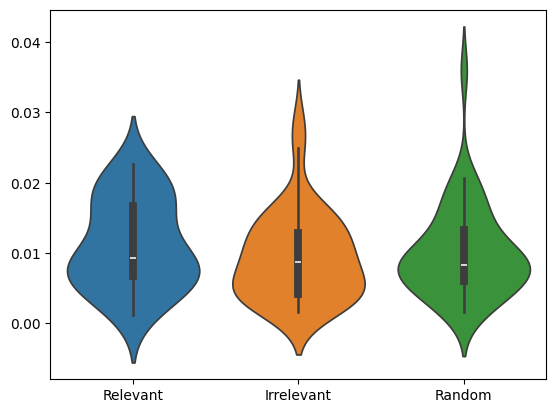

In [27]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_60_40.png"))
new_row = {'n': 50, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 50, p = 600, d = 400

In [28]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.82184 | train_auc: 0.45    | valid_auc: 0.5     |  0:00:01s
epoch 1  | loss: 0.75424 | train_auc: 0.58333 | valid_auc: 0.16667 |  0:00:02s
epoch 2  | loss: 0.73836 | train_auc: 0.55    | valid_auc: 0.0     |  0:00:02s
epoch 3  | loss: 0.80302 | train_auc: 0.64722 | valid_auc: 0.66667 |  0:00:03s
epoch 4  | loss: 0.89924 | train_auc: 0.675   | valid_auc: 0.66667 |  0:00:04s
epoch 5  | loss: 0.76269 | train_auc: 0.6     | valid_auc: 0.83333 |  0:00:05s
epoch 6  | loss: 0.77876 | train_auc: 0.63333 | valid_auc: 0.83333 |  0:00:06s
epoch 7  | loss: 0.7704  | train_auc: 0.54722 | valid_auc: 0.16667 |  0:00:07s
epoch 8  | loss: 0.62696 | train_auc: 0.61389 | valid_auc: 0.16667 |  0:00:08s
epoch 9  | loss: 0.69031 | train_auc: 0.61111 | valid_auc: 0.16667 |  0:00:09s
epoch 10 | loss: 0.73182 | train_auc: 0.51667 | valid_auc: 0.33333 |  0:00:10s
epoch 11 | loss: 0.78169 | train_auc: 0.53889 | valid_auc: 0.33333 |  0:00:11s
epoch 12 | loss: 0.74402 | train_auc: 0.58889 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0003582654134061464
Average irrelevant feature importance: 0.0006119759383633289
Average random feature importance: 0.0016089370847966334
Relevant feature importance: [1.71627300e-04 0.00000000e+00 1.44888987e-04 2.56546228e-05
 5.80687158e-05 1.21172923e-05 6.46831083e-05 1.39317903e-03
 1.93988144e-06 4.29514288e-04 9.37249802e-06 0.00000000e+00
 6.25614926e-04 2.75826068e-05 0.00000000e+00 9.28672633e-04
 0.00000000e+00 0.00000000e+00 2.17741494e-03 8.30335385e-04
 2.55896239e-05 1.20317829e-04 2.74887399e-03 7.46336958e-06
 8.27841320e-04 3.44550200e-04 7.79716065e-09 1.63611400e-03
 0.00000000e+00 1.04037984e-04 3.93123234e-05 6.23748773e-05
 5.31746315e-04 1.19431867e-07 3.82091335e-04 2.44254170e-05
 5.14183469e-07 1.22599533e-04 5.48693713e-06 4.46483854e-04]
Irrelevant feature importance: [3.84800814e-04 5.97846629e-04 3.74474595e-04 0.00000000e+00
 0.00000000e+00 3.25593815e-04 0.00000000e+00 1.76951155e-05
 1.52828697e-04 2.36606132e-04

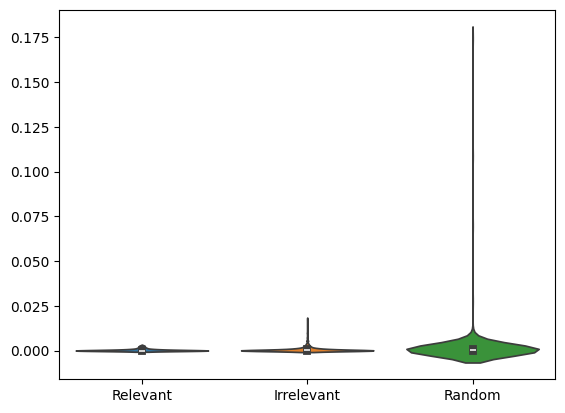

In [29]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_adam_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_50_600_400.png"))
new_row = {'n': 50, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 6, d = 4

In [30]:
data, info = get_files(500, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.78136 | train_auc: 0.78244 | valid_auc: 0.7893  |  0:00:01s
epoch 1  | loss: 0.60375 | train_auc: 0.85392 | valid_auc: 0.70903 |  0:00:02s
epoch 2  | loss: 0.50105 | train_auc: 0.89499 | valid_auc: 0.77592 |  0:00:03s
epoch 3  | loss: 0.50217 | train_auc: 0.91826 | valid_auc: 0.8612  |  0:00:04s
epoch 4  | loss: 0.38503 | train_auc: 0.93929 | valid_auc: 0.89632 |  0:00:05s
epoch 5  | loss: 0.42591 | train_auc: 0.94384 | valid_auc: 0.9097  |  0:00:06s
epoch 6  | loss: 0.4049  | train_auc: 0.94834 | valid_auc: 0.91806 |  0:00:07s
epoch 7  | loss: 0.35566 | train_auc: 0.96555 | valid_auc: 0.93311 |  0:00:08s
epoch 8  | loss: 0.40263 | train_auc: 0.95949 | valid_auc: 0.96154 |  0:00:09s
epoch 9  | loss: 0.39321 | train_auc: 0.96291 | valid_auc: 0.95652 |  0:00:10s
epoch 10 | loss: 0.33225 | train_auc: 0.95925 | valid_auc: 0.92475 |  0:00:11s
epoch 11 | loss: 0.28677 | train_auc: 0.95818 | valid_auc: 0.92977 |  0:00:12s
epoch 12 | loss: 0.38379 | train_auc: 0.96678 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.19546076740271837
Average irrelevant feature importance: 0.12380511891761511
Average random feature importance: 0.041501864989153675
Relevant feature importance: [0.37650809 0.14439157 0.06548263]
Irrelevant feature importance: [0.02023432 0.22737592]
Random feature importance: [0.0696077  0.00444668 0.08225392 0.00969915]
Train AUC score: 0.9952920252138205
Validation AUC score: 1.0
Test AUC score: 0.9948051948051948
False negative rate for relevant features: 0.3333333333333333
False positive rate for irrelevant features: 0.5
False positive rate for random features: 0.25


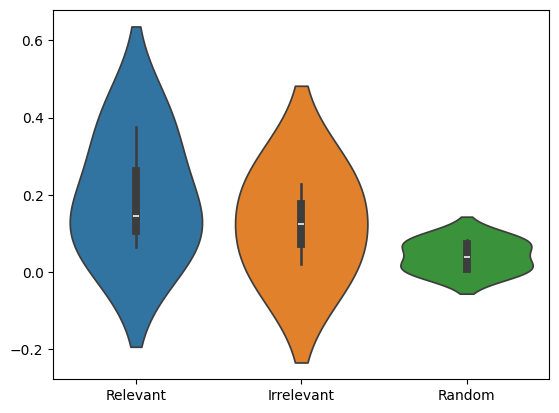

In [31]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_6_4.png"))
new_row = {'n': 500, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 60, d = 40

In [32]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.8433  | train_auc: 0.46971 | valid_auc: 0.34848 |  0:00:01s
epoch 1  | loss: 0.7734  | train_auc: 0.51101 | valid_auc: 0.44108 |  0:00:02s
epoch 2  | loss: 0.73718 | train_auc: 0.5295  | valid_auc: 0.48822 |  0:00:03s
epoch 3  | loss: 0.73411 | train_auc: 0.49508 | valid_auc: 0.54882 |  0:00:04s
epoch 4  | loss: 0.71892 | train_auc: 0.53282 | valid_auc: 0.64141 |  0:00:06s
epoch 5  | loss: 0.70191 | train_auc: 0.52696 | valid_auc: 0.60101 |  0:00:07s
epoch 6  | loss: 0.70691 | train_auc: 0.53973 | valid_auc: 0.5303  |  0:00:08s
epoch 7  | loss: 0.70354 | train_auc: 0.53274 | valid_auc: 0.55892 |  0:00:09s
epoch 8  | loss: 0.70336 | train_auc: 0.57312 | valid_auc: 0.6229  |  0:00:10s
epoch 9  | loss: 0.69545 | train_auc: 0.55851 | valid_auc: 0.52525 |  0:00:11s
epoch 10 | loss: 0.69627 | train_auc: 0.60388 | valid_auc: 0.66498 |  0:00:12s
epoch 11 | loss: 0.68958 | train_auc: 0.61685 | valid_auc: 0.65825 |  0:00:14s
epoch 12 | loss: 0.68798 | train_auc: 0.62122 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.02501630171118073
Average irrelevant feature importance: 0.0077837686590599125
Average random feature importance: 0.005764301354432259
Relevant feature importance: [7.50831676e-02 3.09631482e-05 2.58262428e-03 1.14657449e-01
 6.15244965e-06 1.30458234e-04 3.95930395e-05 1.16810714e-03
 1.37190163e-01 6.94555832e-02 1.53445764e-04 7.73356095e-03
 2.79543621e-04 1.11375545e-04 1.99760590e-04 5.54736664e-03
 3.57602567e-02 1.63859940e-04]
Irrelevant feature importance: [1.17053882e-02 1.82311478e-04 8.15127774e-07 7.13099313e-05
 8.13681512e-06 0.00000000e+00 3.71607061e-04 1.00862645e-01
 4.48123880e-05 1.42981373e-05 0.00000000e+00 1.22106879e-04
 1.90965424e-05 0.00000000e+00 1.43139305e-02 5.93128759e-05
 1.63075983e-02 1.91750582e-04 2.17800538e-03 1.19627988e-01
 0.00000000e+00 5.02912621e-05 6.16382181e-04 4.57600673e-05
 3.13610895e-04 2.70070319e-04 1.37778694e-03 4.80385736e-04
 1.38466813e-03 2.32756887e-03 6.53344794e-05 6.47821391e-05
 2

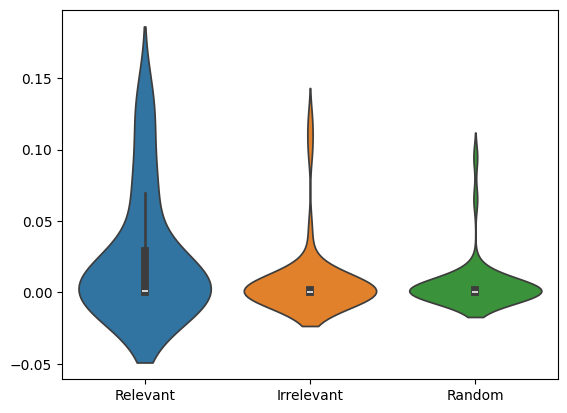

In [33]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_60_40.png"))
new_row = {'n': 500, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 500, p = 600, d = 400

In [34]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.03531 | train_auc: 0.69577 | valid_auc: 0.64333 |  0:00:02s
epoch 1  | loss: 0.84244 | train_auc: 0.7696  | valid_auc: 0.72333 |  0:00:04s
epoch 2  | loss: 0.67787 | train_auc: 0.78453 | valid_auc: 0.71167 |  0:00:07s
epoch 3  | loss: 0.66213 | train_auc: 0.63281 | valid_auc: 0.75    |  0:00:09s
epoch 4  | loss: 0.61961 | train_auc: 0.60903 | valid_auc: 0.5775  |  0:00:12s
epoch 5  | loss: 0.6072  | train_auc: 0.65478 | valid_auc: 0.70333 |  0:00:14s
epoch 6  | loss: 0.60064 | train_auc: 0.81332 | valid_auc: 0.81833 |  0:00:17s
epoch 7  | loss: 0.53315 | train_auc: 0.84426 | valid_auc: 0.84833 |  0:00:19s
epoch 8  | loss: 0.52997 | train_auc: 0.85366 | valid_auc: 0.83917 |  0:00:22s
epoch 9  | loss: 0.47392 | train_auc: 0.87664 | valid_auc: 0.8125  |  0:00:24s
epoch 10 | loss: 0.53355 | train_auc: 0.88614 | valid_auc: 0.81417 |  0:00:26s
epoch 11 | loss: 0.49932 | train_auc: 0.91399 | valid_auc: 0.8825  |  0:00:29s
epoch 12 | loss: 0.51141 | train_auc: 0.90631 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 3.9831446214065214e-05
Average irrelevant feature importance: 0.0018354825404791719
Average random feature importance: 0.00018681028599172846
Relevant feature importance: [4.87711889e-08 0.00000000e+00 5.19826697e-08 0.00000000e+00
 1.17909817e-08 0.00000000e+00 1.53620281e-07 4.87921992e-06
 7.66389943e-07 2.71886621e-07 0.00000000e+00 0.00000000e+00
 8.17434444e-05 3.60179545e-07 9.51344617e-06 3.11107003e-05
 1.93174774e-07 0.00000000e+00 8.61840753e-08 5.48916175e-08
 1.76971196e-06 3.23944107e-04 3.15236615e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.45736440e-04 2.23850371e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.33724462e-04 0.00000000e+00
 7.76873470e-07 0.00000000e+00 2.01537343e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.52214207e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.63822068e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00

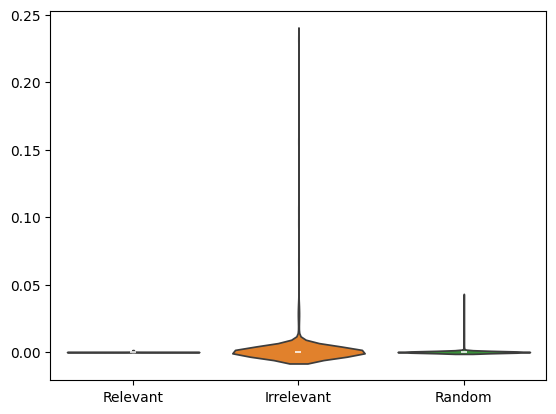

In [35]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_adam_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_500_600_400.png"))
new_row = {'n': 500, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 6, d = 4

In [36]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.55812 | train_auc: 0.90041 | valid_auc: 0.90148 |  0:00:09s
epoch 1  | loss: 0.48721 | train_auc: 0.89779 | valid_auc: 0.91138 |  0:00:18s
epoch 2  | loss: 0.46102 | train_auc: 0.90529 | valid_auc: 0.91515 |  0:00:28s
epoch 3  | loss: 0.4365  | train_auc: 0.90654 | valid_auc: 0.91869 |  0:00:37s
epoch 4  | loss: 0.44477 | train_auc: 0.90966 | valid_auc: 0.91994 |  0:00:47s
epoch 5  | loss: 0.44874 | train_auc: 0.90633 | valid_auc: 0.91674 |  0:00:56s
epoch 6  | loss: 0.4429  | train_auc: 0.90628 | valid_auc: 0.91808 |  0:01:05s
epoch 7  | loss: 0.43565 | train_auc: 0.90747 | valid_auc: 0.91737 |  0:01:15s
epoch 8  | loss: 0.43132 | train_auc: 0.90665 | valid_auc: 0.91882 |  0:01:24s
epoch 9  | loss: 0.43212 | train_auc: 0.9094  | valid_auc: 0.9226  |  0:01:34s
epoch 10 | loss: 0.43118 | train_auc: 0.91004 | valid_auc: 0.9222  |  0:01:43s
epoch 11 | loss: 0.4349  | train_auc: 0.91178 | valid_auc: 0.92271 |  0:01:53s
epoch 12 | loss: 0.43356 | train_auc: 0.91239 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.1410806641751393
Average irrelevant feature importance: 0.4147476603673485
Average random feature importance: 0.005232420733023582
Relevant feature importance: [0.2215905  0.07279013 0.03406997 0.23587206]
Irrelevant feature importance: [0.41474766]
Random feature importance: [1.96323456e-02 1.35353802e-05 2.64396631e-07 1.28353753e-03]
Train AUC score: 0.9207985223604918
Validation AUC score: 0.9304153846153846
Test AUC score: 0.8977381553516393
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


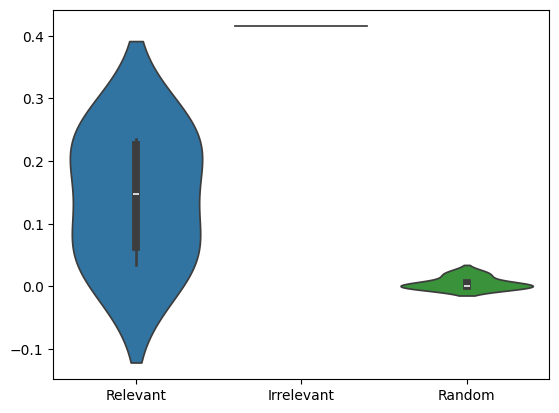

In [37]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_6_4.png"))
new_row = {'n': 5000, 'p': 6, 'd': 4,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 60, d = 40

In [38]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.60944 | train_auc: 0.86708 | valid_auc: 0.88083 |  0:00:10s
epoch 1  | loss: 0.50456 | train_auc: 0.90989 | valid_auc: 0.89184 |  0:00:22s
epoch 2  | loss: 0.45968 | train_auc: 0.93381 | valid_auc: 0.93372 |  0:00:32s
epoch 3  | loss: 0.42589 | train_auc: 0.94957 | valid_auc: 0.94073 |  0:00:43s
epoch 4  | loss: 0.39094 | train_auc: 0.96408 | valid_auc: 0.95915 |  0:00:54s
epoch 5  | loss: 0.35031 | train_auc: 0.97414 | valid_auc: 0.97336 |  0:01:05s
epoch 6  | loss: 0.32929 | train_auc: 0.97161 | valid_auc: 0.97494 |  0:01:16s
epoch 7  | loss: 0.32732 | train_auc: 0.98056 | valid_auc: 0.97926 |  0:01:27s
epoch 8  | loss: 0.33328 | train_auc: 0.97911 | valid_auc: 0.96773 |  0:01:37s
epoch 9  | loss: 0.29478 | train_auc: 0.9801  | valid_auc: 0.97731 |  0:01:48s
epoch 10 | loss: 0.32695 | train_auc: 0.98218 | valid_auc: 0.98148 |  0:01:59s
epoch 11 | loss: 0.29447 | train_auc: 0.98324 | valid_auc: 0.98244 |  0:02:10s
epoch 12 | loss: 0.2906  | train_auc: 0.98334 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0155222044191406
Average irrelevant feature importance: 0.01715886644911633
Average random feature importance: 0.00014075404579673946
Relevant feature importance: [8.28953179e-02 1.32703270e-05 1.17237380e-04 1.71257955e-08
 0.00000000e+00 0.00000000e+00 7.64265605e-02 1.30028263e-07
 4.05946795e-06 1.10572933e-02 2.30362564e-04]
Irrelevant feature importance: [8.04480826e-02 1.34703074e-03 1.21866288e-02 4.92993005e-02
 3.73859134e-02 0.00000000e+00 2.69046138e-04 2.51521787e-06
 0.00000000e+00 6.16511745e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.67105528e-04 0.00000000e+00 0.00000000e+00
 5.38920486e-02 9.41054329e-04 0.00000000e+00 1.62963585e-05
 6.12781449e-02 7.24623635e-02 3.70396769e-07 2.15490385e-02
 0.00000000e+00 0.00000000e+00 2.89014110e-03 8.85522632e-04
 8.40041607e-02 8.70172629e-05 0.00000000e+00 8.48087770e-03
 1.01149958e-01 6.36214741e-09 0.00000000e+00 1.26828357e-01
 0.00000000e+00 2.06638731e-06 0.00000000e+00 0.0

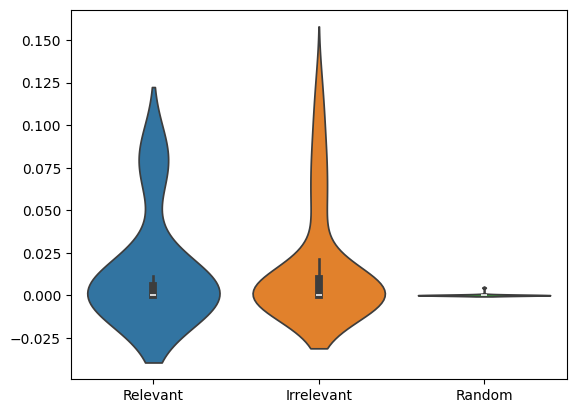

In [39]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_60_40.png"))
new_row = {'n': 5000, 'p': 60, 'd': 40,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

### Adam; N = 5000, p = 600, d = 400

In [40]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = adam)
clf_adam_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.69753 | train_auc: 0.76912 | valid_auc: 0.76359 |  0:00:22s
epoch 1  | loss: 0.57225 | train_auc: 0.84396 | valid_auc: 0.80502 |  0:00:43s
epoch 2  | loss: 0.52994 | train_auc: 0.87047 | valid_auc: 0.85617 |  0:01:06s
epoch 3  | loss: 0.48891 | train_auc: 0.87818 | valid_auc: 0.85041 |  0:01:28s
epoch 4  | loss: 0.49025 | train_auc: 0.89446 | valid_auc: 0.87015 |  0:01:50s
epoch 5  | loss: 0.47849 | train_auc: 0.89941 | valid_auc: 0.87464 |  0:02:12s
epoch 6  | loss: 0.46499 | train_auc: 0.90294 | valid_auc: 0.87015 |  0:02:34s
epoch 7  | loss: 0.46426 | train_auc: 0.90745 | valid_auc: 0.88092 |  0:02:56s
epoch 8  | loss: 0.44879 | train_auc: 0.90742 | valid_auc: 0.88806 |  0:03:18s
epoch 9  | loss: 0.44917 | train_auc: 0.91277 | valid_auc: 0.87889 |  0:03:40s
epoch 10 | loss: 0.44339 | train_auc: 0.91859 | valid_auc: 0.88142 |  0:04:02s
epoch 11 | loss: 0.44633 | train_auc: 0.92375 | valid_auc: 0.88378 |  0:04:24s
epoch 12 | loss: 0.41109 | train_auc: 0.91851 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0003829492562844827
Average irrelevant feature importance: 0.0026678992784067673
Average random feature importance: 0.00044131597433450187
Relevant feature importance: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.48551789e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.89720847e-08 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.23544542e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00


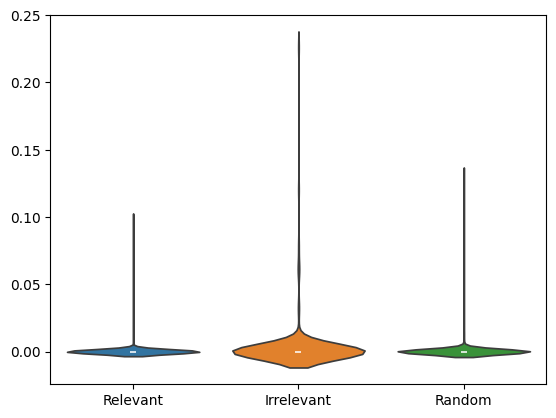

In [41]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_adam_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))
print("Relevant feature importance:", relevant)
print("Irrelevant feature importance:", irrelevant)
print("Random feature importance:", random)

train_auc, valid_auc, test_auc = compute_auc(clf_adam_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

plt.savefig(os.path.join("Results/Adam", "violin_plot_adam_5000_600_400.png"))
new_row = {'n': 5000, 'p': 600, 'd': 400,
           'rel_imp': np.mean(relevant), 'irrel_imp': np.mean(irrelevant), 'rand_imp': np.mean(random),
           'rel_imp_std': np.std(relevant), 'irrel_imp_std': np.std(irrelevant), 'rand_imp_std': np.std(random),
           'train_auc': train_auc, 'valid_auc': valid_auc, 'test_auc': test_auc,
           'fn_rel': fn_relevant, 'fp_irrel': fp_irrelevant, 'fp_rand': fp_random}
adam_df = pd.concat([adam_df, pd.DataFrame([new_row])], ignore_index=True)

In [42]:
adam_df.to_csv(os.path.join("Results/Adam", "adam_data.csv"), index=False)